# Exploratory Data Analysis

The first and important step in our project is to select a dataset to build a book recommendation system. The dataset must be of a reasonable size and include book reviews made by users in the past. Therefore, we chose this dataset [Book-Crossing Dataset](https://www.kaggle.com/datasets/saurabhbagchi/books-dataset) available in [Kaggle](https://www.kaggle.com/).
The Book-Crossing Dataset was originally mined by Cai-Nicolas Ziegler in 2004 form [Book-Crossing](https://www.bookcrossing.com/) community. More information about the database could find in this [links](http://www2.informatik.uni-freiburg.de/~cziegler/BX/).
The usability score of the database on Kaggle is 10.0, which is the maximum. Other datasets with user ratings could be found in Kaggle, but were not used for this project because they were  voluminous, such as https://www.kaggle.com/datasets/bahramjannesarr/goodreads-book-datasets-10m (1.18 GB), or because the source of the data was not provided, as in https://www.kaggle.com/datasets/ruchi798/bookcrossing-dataset.
The Book-Crossing Dataset contains 278 858 anonymized users but with their demographic information, provide 1.149.780 ratings) and about 271.379 books.

This notebook is divided in two parts. The first part is about cleaning the database and the second part is the Exploratory Data Analysis.

## Setup the environment

An environment was created for this project. The python version is 3.10.8 as seen below

In [1]:
!echo %CONDA_DEFAULT_ENV%

mlProject


To use linear algebra we import numpy and to process the data we import pandas

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing

To get and manipulate file, we import the os package

In [88]:
import os

To visualize data we install an import matplotlib and to improv visualization we use seaborn

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS

## Loading and cleaning the data

In [91]:
#path and file name
files_path="./dataset/books_data/"
#files_path="C:/Users/adrie/Workspace_Python/dataset/books_data/"
books_csv="books.csv"
users_csv="users.csv"
ratings_csv="ratings.csv"

In [92]:
books = pd.read_csv(files_path+books_csv, sep=";",on_bad_lines='warn', encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 
                 'imageUrlS', 'imageUrlM', 'imageUrlL']

C:\Users\BAAMARA\AppData\Local\Temp\ipykernel_24696\1744898156.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(files_path+books_csv, sep=";",on_bad_lines='warn', encoding="latin-1")


As we can see, some lines were skipped because they have too many fields. We should see if this data can be cleanned so we can used them. As we doesn't have many rows in error and the files are readable with tools like Notepad++ or Excel, we can do it manually. If it wasn't the case we should have wrote a custom reader to store the line in error.
When looking at the file we can see the presence of "`&amp;`"  string which can create unexpected columns du to the semicolon. To correct that, we remplace "`&amp;`"  by "&"
By rerunning the read_csv function, we still have some errors:

Skipping line 43667: expected 8 fields, saw 10

Skipping line 144058: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9

Skipping line 209388: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 10
Skipping line 261529: expected 8 fields, saw 9

Again this result of title containing both " \" " and " ; ". As we have only 6 rows affected, we correct them manually by replacing " \" " by " ' " then " ; " by " , " if necessary.
Rerunning the above cell and check if all lines are loaded:

In [93]:
books.shape

(271379, 8)

The number of rows and columns in the dataFram is the same than the file, so far so good.
We can now explore the data

## Search of inconsistency in the data

### Cleaning of the books dataset

In [94]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


We observe that the three last columns are URL of image so we can discard them as they don't contain useful data as we don't need to load image only print the title of the book to give recommentation (altough it could be useful for an web application, so in that case we would have kept those columns)

In [95]:
books=books.drop(['imageUrlS','imageUrlM','imageUrlL'], axis=1)
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company


The dataframe has 5 columns remaining. The ISBN allow to uniquely identify each book.
The column yearOfPublication should contain only year and be convertible to integer. We check if it's the case

In [96]:
books["yearOfPublication"].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '1999', '2002', '2001', '2000',
       '1996', '1992', '1995', '2004', '2003', '1990', '1994', '1986',
       '1989', '1981', '1993', '1983', '1982', '1976', '1991', '1977',
       '1998', '0', '1997', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

We observe that some date are instead publishers. We retrieve this observations:

In [97]:
bad_rows=books[(books["yearOfPublication"]=='DK Publishing Inc') | (books["yearOfPublication"] == 'Gallimard')]
bad_rows

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209550,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
220744,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...
221691,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


The book title seems to contain the book author. We clean this rows.

In [98]:
bad_rows[['realBookTitle','realBookAuthor']]=bad_rows.bookTitle.str.split('\\\\";',expand=True)
bad_rows

C:\Users\BAAMARA\AppData\Local\Temp\ipykernel_24696\1913220620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_rows[['realBookTitle','realBookAuthor']]=bad_rows.bookTitle.str.split('\\\\";',expand=True)
C:\Users\BAAMARA\AppData\Local\Temp\ipykernel_24696\1913220620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_rows[['realBookTitle','realBookAuthor']]=bad_rows.bookTitle.str.split('\\\\";',expand=True)


,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,realBookTitle,realBookAuthor
209550,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,"DK Readers: Creating the X-Men, How It All Beg...","Michael Teitelbaum"""
220744,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,"Peuple du ciel, suivi de 'Les Bergers","Jean-Marie Gustave Le ClÃ?Â©zio"""
221691,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,"DK Readers: Creating the X-Men, How Comic Book...","James Buckley"""


In [99]:
lst=[]
for i in bad_rows.index:
    lst.append(i)
    books.loc[i,"publisher"]=bad_rows.loc[i,"yearOfPublication"]
    books.loc[i,"yearOfPublication"]=bad_rows.loc[i,"bookAuthor"]
    books.loc[i,"bookAuthor"]=bad_rows.loc[i,"realBookAuthor"]
    books.loc[i,"bookTitle"]=bad_rows.loc[i,"realBookTitle"]
books.loc[lst]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209550,078946697X,"DK Readers: Creating the X-Men, How It All Beg...","Michael Teitelbaum""",2000,DK Publishing Inc
220744,2070426769,"Peuple du ciel, suivi de 'Les Bergers","Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard
221691,0789466953,"DK Readers: Creating the X-Men, How Comic Book...","James Buckley""",2000,DK Publishing Inc


In [100]:
books["bookAuthor"]=books["bookAuthor"].str.replace('"',"'")

In [101]:
books["bookAuthor"]=books["bookAuthor"].str.replace(r'\\',"")

C:\Users\BAAMARA\AppData\Local\Temp\ipykernel_24696\2171518004.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  books["bookAuthor"]=books["bookAuthor"].str.replace(r'\\',"")


Some rows has quote or double quote at the end of bookAuthor or bookTitle that doesn't close another quote. We remove them.

In [102]:
books[books["bookAuthor"].str.endswith("'",na=False) & books["bookAuthor"].str.count("'")%2==1]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
98288,0416652700,The Pooh cook book: inspired by \Winnie-the-Po...,;Katie Stewart',1971,Methuen
112280,1853114103,Lord Have Mercy,'Ron'',2001,Canterbury Press
117995,0786881364,A Simple Program : A Contemporary Translation ...,J 'j'',1996,Hyperion
209550,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum',2000,DK Publishing Inc
220744,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio',2003,Gallimard
221691,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley',2000,DK Publishing Inc
223761,1895455243,Finger Food (Company's Coming Pint Size),Jean Pare',1993,Company's Coming Publishing
245727,0961364920,A Timeless Place: Lett's Set a Spell at the Co...,Sandra 'Sandy Lynn' Lett',2001,Transformations


In [103]:
condition=books["bookAuthor"].str.endswith("'",na=False) & books["bookAuthor"].str.count("'")%2==1
books.loc[condition,"bookAuthor"]=books.loc[condition,"bookAuthor"].str.rstrip("'")

In [104]:
books[books["bookAuthor"].str.endswith('"',na=False) & books["bookAuthor"].str.count('"')%2==1]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


In [105]:
condition=books["bookTitle"].str.endswith("'",na=False) & books["bookTitle"].str.count("'")%2==1
books.loc[condition,"bookTitle"]

9345      The Way You Wear Your Hat: Frank Sinatra and t...
11311                             All over but the Shoutin'
18282                                           Dottor Niu'
24169                                You Gotta Keep Dancin'
43366                             All over but the Shoutin'
57506                             All Over but the Shoutin'
63728     The Way You Wear Your Hat: Frank Sinatra and t...
70940                                      Love Everlastin'
92036     Schrodinger's Cat Trilogy : 'The Universe Next...
103821                                          Everlastin'
113807    Kevin Myers: From the Irish Times Column 'an I...
117516        Charles Darwin's 'The Life of Erasmus Darwin'
120239                                      Cause cÃ?Â©leb'
133467                                    Like I Was Sayin'
140451                    Garri Potter i filosofskii kamen'
155287                                       Freaky Dancin'
182933                            All Ov

In [106]:
books.loc[condition,"bookTitle"]=books.loc[condition,"bookTitle"].str.rstrip("'")

In [107]:
books.loc[condition,"bookTitle"]

9345      The Way You Wear Your Hat: Frank Sinatra and t...
11311                              All over but the Shoutin
18282                                            Dottor Niu
24169                                 You Gotta Keep Dancin
43366                              All over but the Shoutin
57506                              All Over but the Shoutin
63728     The Way You Wear Your Hat: Frank Sinatra and t...
70940                                       Love Everlastin
92036     Schrodinger's Cat Trilogy : 'The Universe Next...
103821                                           Everlastin
113807    Kevin Myers: From the Irish Times Column 'an I...
117516         Charles Darwin's 'The Life of Erasmus Darwin
120239                                       Cause cÃ?Â©leb
133467                                     Like I Was Sayin
140451                     Garri Potter i filosofskii kamen
155287                                        Freaky Dancin
182933                             All O

In [108]:
condition=books["bookTitle"].str.endswith('"',na=False) & books["bookTitle"].str.count('"')%2==1
books.loc[condition,"bookTitle"]=books.loc[condition,"bookTitle"].str.rstrip('"')

In [109]:
books["bookTitle"]=books["bookTitle"].str.replace(r'\\',"")

C:\Users\BAAMARA\AppData\Local\Temp\ipykernel_24696\2450684123.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  books["bookTitle"]=books["bookTitle"].str.replace(r'\\',"")


We now remove the possible double double quote and double simple quote at the end of the titles:

In [110]:
books["bookTitle"]=books["bookTitle"].str.rstrip('""')
books["bookTitle"]=books["bookTitle"].str.rstrip("''")

We transform the year in integer to better handle them

In [111]:
books.yearOfPublication=books.yearOfPublication.astype("int")

In [112]:
print(sorted(books.yearOfPublication.unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


We observe a discontinuity in the year of publication after 2008. Also the dataset was made in summer 2004 so all books after 2005 are probably placeholder or data error. We replace the year of publication of this books with the mean after setting the value at nan so this rows doesn't affect the statistics of our data. The books of 2005 have good probability to be accurate as a planned publication to one year is common so we don't modify them but this can be discuss.

In [113]:
books.loc[(books.yearOfPublication==0)|(books.yearOfPublication>2005) ,'yearOfPublication' ] = np.nan
books.yearOfPublication = books.yearOfPublication.fillna(round(books.yearOfPublication.mean()))

We check the presence of null value in the dataFrame

In [114]:
books[books.yearOfPublication.isna()]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


In [115]:
books[books.bookTitle.isna()]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


In [116]:
books[books.bookAuthor.isna()]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
187700,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995.0,Edinburgh Financial Publishing


Based oon the book title and the publisher, the author of the book seems to be Sophie Pyott, Larissa Anne Downe or both as the data are not the same on google books and goodread also the ISBN is not the same and for the same ISBN the bookAuthor is really NaN. In doubt we choose to not update this row. 

In [117]:
books[books.publisher.isna()]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
128896,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN
129043,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN


The publisher can be find by searching the ISBN on online database (isbnsearch.org, amazon.com or google books) and filter by the year of publication. We find that this two books were publisher by
Novelbooks Incorporated. We update this two rows with the found value.

In [118]:
books.loc[books.ISBN=='193169656X','publisher']='Novelbooks Incorporated'
books.loc[books.ISBN=='1931696993','publisher']='Novelbooks Incorporated'

In [119]:
books[books.ISBN.isna()]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


In [120]:
books.iloc[1,2]

'Richard Bruce Wright'

Only the columns `bookAuthor` and `publisher` have very few null value. We decide to keep them as the information in these rows can still be useful. We always could delete them later.

#### Booking Id

We finally add a column `bookID` to assign an unique id to a book based on the book title and the book author since each separate edition of a book will have different ISBN.

We can see bellow that each `ISBN` value is unique in dataset but the book title are not.

In [121]:
books[books.ISBN.duplicated(keep=False)]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


In [122]:
books[books.bookTitle.duplicated(keep=False)].sort_values('bookTitle')

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
267818,0140236465,Wuthering Heights According to Spike Milligan,Spike Milligan,1995.0,Penguin Books Ltd
44915,0718137876,Wuthering Heights According to Spike Milligan,Spike Milligan,1994.0,Michael Joseph
75640,1565920465,!%@ (A Nutshell handbook),Donnalyn Frey,1994.0,O'Reilly
156349,1565920317,!%@ (A Nutshell handbook),Donnalyn Frey,1993.0,O'Reilly
140624,0792276833,'A Hell of a Place to Lose a Cow': An American...,Tim Brookes,2000.0,National Geographic
...,...,...,...,...,...
193468,0316089702,dot.bomb: My Days and Nights at an Internet Go...,J. David Kuo,2002.0,Back Bay Books
193447,0316507490,dot.bomb: My Days and Nights at an Internet Go...,J. David Kuo,2001.0,"Little, Brown"
164122,158621182X,dot.bomb: My Days and Nights at an Internet Go...,J. David Kuo,2001.0,Time Warner Audio Major
185474,3492218091,Ã?Â?berleben in der WÃ?Â¼ste Danakil.,RÃ?Â¼diger Nehberg,1994.0,Piper


In [123]:
books["bookId"]=-1
dict_book_id={}
book_id=[0]
def inc():
    book_id[0]+=1
    return book_id[0]
def add_id_book(df,i):
    c=(str(df.iloc[i,1]).casefold(),str(df.iloc[i,2]).casefold())
    prev=dict_book_id.get(c,-2)
    if prev==-2:
        df.iloc[i,5]=inc()
        dict_book_id[c]=book_id[0]
    else:
        df.iloc[i,5]=prev  
[add_id_book(books,i) for i in range(books.shape[0])]
books.loc[books.bookId==-1].sort_values("bookTitle")

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,bookId


In [124]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,bookId
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,1
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,2
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,3
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,4
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton & Company,5


We will need the cleaned book dataset for later so we export it in the csv format.

In [125]:
books.to_csv('dataset/cleaned_books.csv',sep=';',index=False)

### Cleaning of the users dataset

In [126]:
users = pd.read_csv(files_path+users_csv, sep=';', on_bad_lines='warn', encoding="latin-1",
                   dtype={'Age':'Int32'})
users.columns = ['userID', 'Location', 'Age']

In [127]:
users[ (users.Age>99) | (users.Age<5) ].count()[0] 
#118 is the age of the oldest person nowadays, 5 is the regular age where children learn to read

1255

They are 960 users which have incoherent or irrelevant age. We update this values with nan value

In [128]:
users.loc[ (users.Age>99) | (users.Age<5), 'Age'] = np.nan

We update the nan age value with the average age.

In [129]:
users.Age = users.Age.fillna(round(users.Age.mean()))

In [130]:
users.dtypes

userID       int64
Location    object
Age          Int32
dtype: object

The column types are good so we change nothing.

In [131]:
users[users.Location.str.contains('"')]

,userID,Location,Age
267,268,"århus, \n/a\"", denmark""",35
1102,1103,"kuala lumpur, \n/a\"", malaysia""",35
1272,1273,"valladolid, \n/a\"", spain""",27
1305,1306,"lisbon, \n/a\"",""",41
1694,1695,"london, \n/a\"", united kingdom""",69
...,...,...,...
277747,277748,"rimini, \n/a\"", italy""",35
277859,277860,"barcelona, \n/a\"", spain""",25
278137,278138,"oviedo, \n/a\"", spain""",49
278342,278343,"växjö, \n/a\"", sweden""",35


We can do the same operation done for books

In [132]:
users["Location"]=users["Location"].str.replace('"',"'")
users["Location"]=users["Location"].str.replace(r'\\',"")

C:\Users\BAAMARA\AppData\Local\Temp\ipykernel_24696\363032854.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  users["Location"]=users["Location"].str.replace(r'\\',"")


In [133]:
users["Location"]=users["Location"].str.replace("n/a'","n/a")
users["Location"]=users["Location"].str.replace("'n/a","n/a")

In [134]:
condition=users["Location"].str.endswith("'",na=False) & users["Location"].str.count("'")%2==1
users.loc[condition,"Location"]=users.loc[condition,"Location"].str.rstrip("'")

In [135]:
users[users.Location.str.contains("'")].sort_values(by="Location")

,userID,Location,Age
244250,244251,"alexandria'., 'alexandria'., egypt'",44
80169,80170,"athens, ano liosia', greece'",16
10276,10277,"düsseldorf, na', germany'",35
158161,158162,"holbæk, n/j', denmark'",35
119745,119746,"kartoum, n/s', sudan'",28
69341,69342,"kocaeli, na'., turkey'",35
197600,197601,"ljubljana, na', slovenia'",35
72128,72129,"lleida, catalunya', spain'",21
72592,72593,"lujan de cuyo, mendoza/argentina', argentina'",25
252668,252669,"manchester, na', united kingdom'",35


We observe we can remove all the remaining quote in the column Location as all are irrelevant.

In [136]:
users["Location"]=users["Location"].str.replace("'","")

In [137]:
users[users.Location.str.contains("'")]

,userID,Location,Age


Now that the bad characters are cleaned, we can divide the column Location in 3 new columns 'city', state and country.

In [138]:
users.loc[users["Location"].str.count(",")>2]

,userID,Location,Age
435,436,"ivanhoe, melbourne, victoria, australia",53
814,815,"davis bay, sechelt, british columbia, canada",43
840,841,"saint charles, mo, missouri, usa",24
956,957,"santiago, santiago,metropolitana, chile",35
1459,1460,"mansoura, dakahlia, mansoura, egypt",34
...,...,...,...
277717,277718,"colorado springs, co 80901, colorado, usa",62
277753,277754,"north bend,, oregon, usa",60
278028,278029,"mansfield, nottinghamshire, england, united ki...",31
278214,278215,"nelson, motueka, nz, new zealand",28


1508 rows have incorrect location. The error is the city part. A regular split cant' be done if we dont what loose information, particularly the country.

In [139]:
users["city"]=users.apply(lambda row: row["Location"].split(',')[0],axis=1)
users["state"]=users.apply(lambda row: 
                           row["Location"][row["Location"].find(','):row["Location"].rfind(',')],axis=1)
users["country"]=users.apply(lambda row: row["Location"].split(',')[-1],axis=1)

In [140]:
users["state"]=users["state"].str.removeprefix(", ")
users["state"]=users["state"].str.removeprefix(",")
users["state"]=users["state"].str.removeprefix(" ")
users["city"]=users["city"].str.strip(" ")
users["country"]=users["country"].str.strip(" ")
users.loc[users["state"].str.contains(",")]

,userID,Location,Age,city,state,country
435,436,"ivanhoe, melbourne, victoria, australia",53,ivanhoe,"melbourne, victoria",australia
814,815,"davis bay, sechelt, british columbia, canada",43,davis bay,"sechelt, british columbia",canada
840,841,"saint charles, mo, missouri, usa",24,saint charles,"mo, missouri",usa
956,957,"santiago, santiago,metropolitana, chile",35,santiago,"santiago,metropolitana",chile
1459,1460,"mansoura, dakahlia, mansoura, egypt",34,mansoura,"dakahlia, mansoura",egypt
...,...,...,...,...,...,...
277717,277718,"colorado springs, co 80901, colorado, usa",62,colorado springs,"co 80901, colorado",usa
277753,277754,"north bend,, oregon, usa",60,north bend,", oregon",usa
278028,278029,"mansfield, nottinghamshire, england, united ki...",31,mansfield,"nottinghamshire, england",united kingdom
278214,278215,"nelson, motueka, nz, new zealand",28,nelson,"motueka, nz",new zealand


The state column is ambigus as some countries have specific mapping so the above output is acceptable

In [141]:
users=users.drop("Location", axis=1)
users.head()

,userID,Age,city,state,country
0,1,35,nyc,new york,usa
1,2,18,stockton,california,usa
2,3,35,moscow,yukon territory,russia
3,4,17,porto,v.n.gaia,portugal
4,5,35,farnborough,hants,united kingdom


In [142]:
condition=users.state.str.startswith(',')
users.loc[condition,"state"]=users.loc[condition,"state"].str.lstrip(',')
condition=users.state.str.startswith(' ')
users.loc[condition,"state"]=users.loc[condition,"state"].str.lstrip()

In [143]:
condition=users.state.str.startswith(' ')
users[condition]

,userID,Age,city,state,country


The users datafram is now clean, we apply the same process to the ratings dataset

In [144]:
users.to_csv('dataset/cleaned_users.csv',sep=';',index=False)

### Cleaning the ratings dataset

In [145]:
ratings = pd.read_csv(files_path+ratings_csv, sep=';',  on_bad_lines='warn', encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

In [146]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [57]:
ratings.bookRating.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

The bookRating column has value between 0 and 10 as expected so nothing to do with this column

In [147]:
[print("userID as na value") if ratings[ratings[x].isna()].shape[0]!=0 else print(f"all good for {x}")  for x in ratings.columns] 

all good for userID
all good for ISBN
all good for bookRating


[None, None, None]

None of the columns have na value

In [148]:
ratings.dtypes

userID         int64
ISBN          object
bookRating     int64
dtype: object

All userID are integers so they aren't format problem for this feature

In [149]:
condition=(ratings["ISBN"].str.contains('"') ) | (ratings["ISBN"].str.contains(r'\\') ) 
bad_isbn=ratings.loc[condition]
bad_isbn

,userID,ISBN,bookRating
21687,4377,"\0210000010""",8
45327,11676,"\0432534220\""""",6
45328,11676,"\2842053052\""""",7
183260,39821,"\0432534220\""""",6
210091,48821,"\8804501367\""""",0
531936,128375,"\2842053052\""""",0
663235,160867,"\0094749809""",7
824820,199138,"\0432534220\""""",8
877347,212647,"\8804520159\""""",7
941677,227945,"\9170010242\""""",10


As for the previous dataset, we observe error of quoting on some observation. They still represente accurate data hence we choose to clean them in order to keep them.

In [150]:
bad_isbn["ISBN"]=bad_isbn["ISBN"].str.replace('"',"")
bad_isbn["ISBN"]=bad_isbn["ISBN"].str.replace('\\',"",regex=True)
bad_isbn

C:\Users\BAAMARA\AppData\Local\Temp\ipykernel_24696\366634450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_isbn["ISBN"]=bad_isbn["ISBN"].str.replace('"',"")
C:\Users\BAAMARA\AppData\Local\Temp\ipykernel_24696\366634450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_isbn["ISBN"]=bad_isbn["ISBN"].str.replace('\\',"",regex=True)


,userID,ISBN,bookRating
21687,4377,0210000010,8
45327,11676,0432534220,6
45328,11676,2842053052,7
183260,39821,0432534220,6
210091,48821,8804501367,0
531936,128375,2842053052,0
663235,160867,0094749809,7
824820,199138,0432534220,8
877347,212647,8804520159,7
941677,227945,9170010242,10


In [151]:
ratings.update(bad_isbn)

In [152]:
condition=(ratings["ISBN"].str.contains('"') ) | (ratings["ISBN"].str.contains(r'\\') ) 
ratings[condition]

,userID,ISBN,bookRating


We convert the `userID` and `bookRating` columns to integer type.

In [156]:
ratings['userID'] = ratings['userID'].astype(int)
ratings['bookRating'] = ratings['bookRating'].astype(int)

In [157]:
ratings.to_csv('dataset/cleaned_ratings.csv',sep=';',index=False)

All data are now cleaned. We pass to the analysis part.

<a id='eda'></a>
## Exploratory Data Analysis

<a id="eda">Exploratory Data Analysis</a>

In [65]:
round(users.Age.mean())

35

The average age of the user is approximatively 35.

The distribution of ratings is:

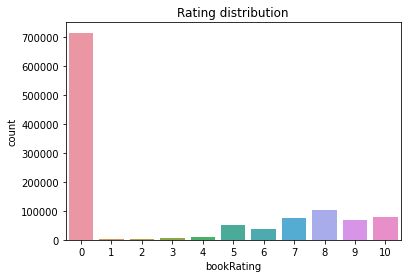

In [158]:
sns.countplot(x="bookRating",data=ratings)
plt.title("Rating distribution")
plt.show()

In [159]:
ratings.bookRating.value_counts(normalize=True)

0     0.622823
8     0.090222
10    0.068370
7     0.066497
9     0.058743
5     0.044334
6     0.032114
4     0.007744
3     0.005215
2     0.002400
1     0.001539
Name: bookRating, dtype: float64

We observe that 62% of the ratings are equal to 0, which is a significant portion of the data set. Rating of 0 means  that the book was not explicitly rated  by the user. The score 0 corresponds to the implicit rating. only the explicit rating using be used to build our Recommender system. We will drop the implicit rating once the EDA is done.

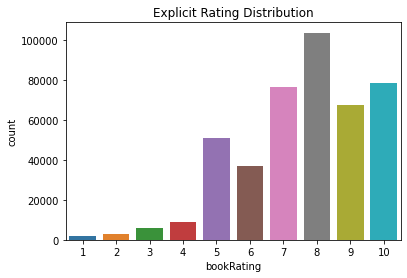

In [161]:
sns.countplot(x="bookRating", data=ratings[ratings["bookRating"]!=0])
plt.title("Explicit Rating Distribution")
plt.show()

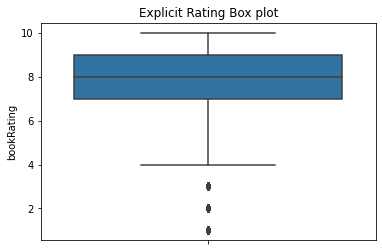

In [162]:
sns.boxplot(y="bookRating", data=ratings[ratings["bookRating"]!=0])
plt.title("Explicit Rating Box plot")
plt.show()

Only 25% of the books have explicit rating less than 7. The score 8 is the most represented rating so most user are happy with their books. It should also be easy to recommend good books to one user based on the liking of the others

### User dataset EDA

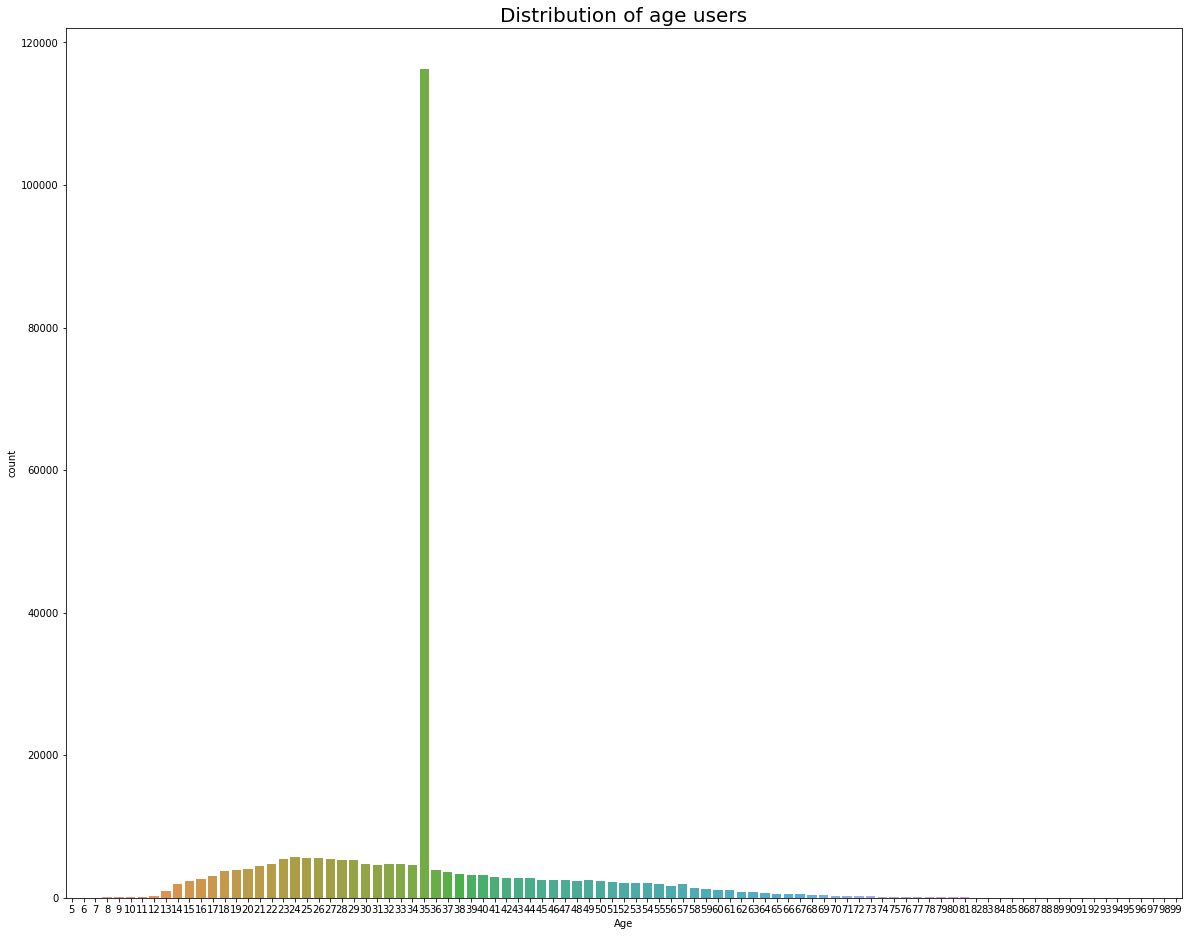

In [68]:
plt.figure(figsize=(20,16))
sns.countplot(x="Age", data=users)
plt.title("Distribution of age users", size=20)
plt.show()

We observe a pic at 35 wich is logical as we have replaced all na and extremum values by 35 to preserve the mean of the dataset

If we remove the 35 value, we see a distribution narrow at the low age and descrising after 35. This is coherent with the public reading and ratings books. It's generally adolescent and adult that read and used application ratings. 

In [69]:
bins = [5, 12, 18, 35, 65, np.inf]
names = ['5-12', '12-18', '18-35', '35-65','65+']
users['AgeCategory'] = pd.cut(users['Age'], bins, labels=names)
users.head(10)

,userID,Age,city,state,country,AgeCategory
0,1,35,nyc,new york,usa,18-35
1,2,18,stockton,california,usa,12-18
2,3,35,moscow,yukon territory,russia,18-35
3,4,17,porto,v.n.gaia,portugal,12-18
4,5,35,farnborough,hants,united kingdom,18-35
5,6,61,santa monica,california,usa,35-65
6,7,35,washington,dc,usa,18-35
7,8,35,timmins,ontario,canada,18-35
8,9,35,germantown,tennessee,usa,18-35
9,10,26,albacete,wisconsin,spain,18-35


In [70]:
#ageRepartition=users[["userID", "AgeCategory"]].groupby("AgeCategory").count()
ageRepartition=users[["userID", "AgeCategory"]].value_counts("AgeCategory")
ageRepartition.columns=["count"]
ageRepartition.head(10)

AgeCategory
18-35    195279
35-65     64734
12-18     14547
65+        3714
5-12        558
dtype: int64

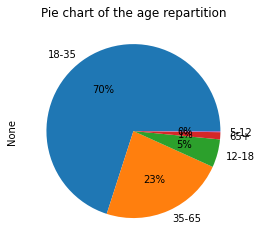

In [71]:
plt=ageRepartition.plot(kind="pie",y="count", autopct='%1.0f%%',title="Pie chart of the age repartition")

Even by removing the people of 35 years old, we see that the 18-35 category is the most represented.

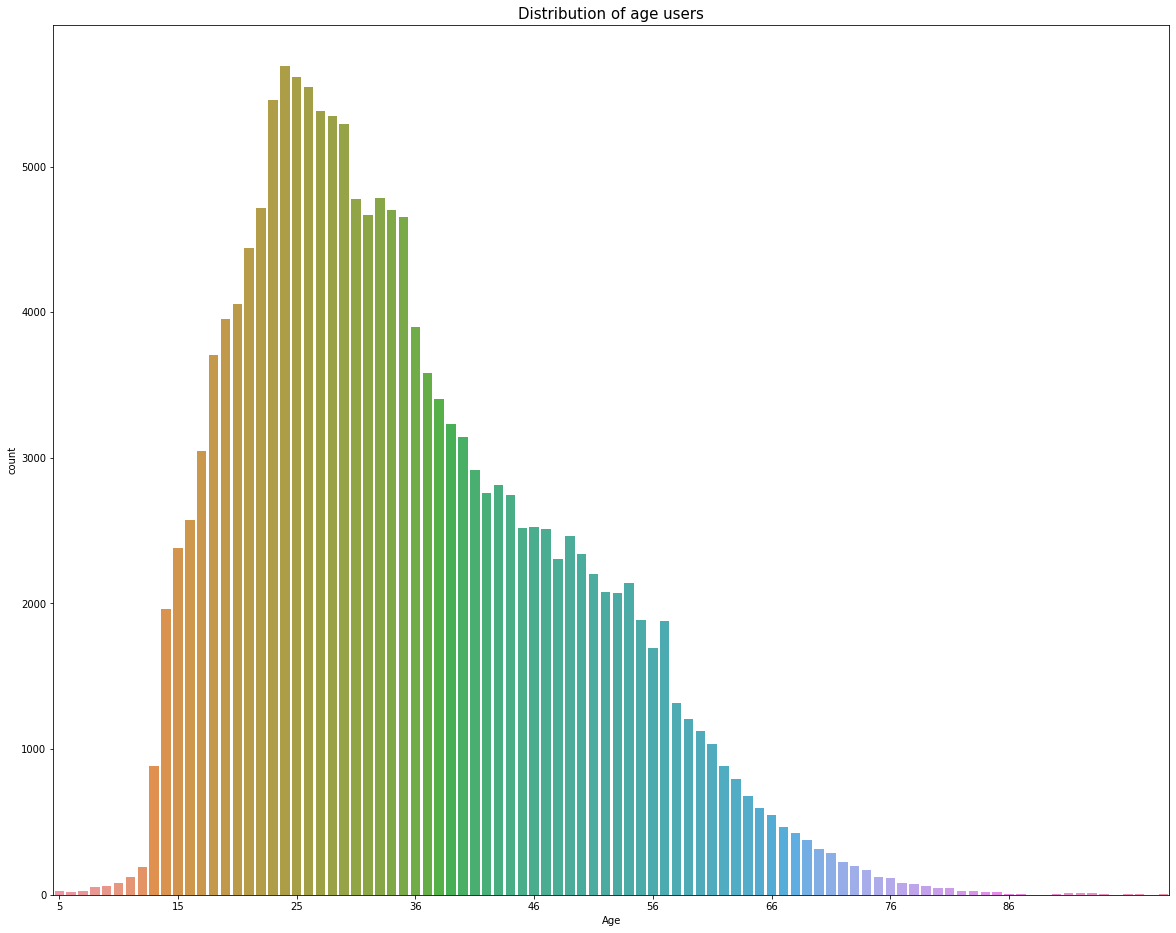

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,16))
fig=sns.countplot(x="Age", data=users[users.Age!=35])
fig.set_xticks(range(0,90,10))
plt.title("Distribution of age users", size=15)
plt.show()

### Books dataset EDA

number of author publish per year

In [73]:
df_author_per_year=books[books["yearOfPublication"]>1900].groupby("yearOfPublication", as_index=False)[["bookTitle"]].count()
df_author_per_year.columns=["year","nbBooks"]

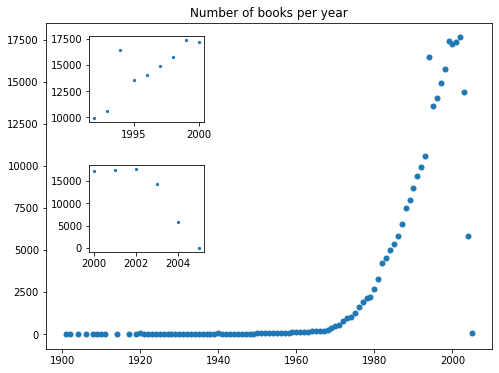

In [74]:
fig=plt.figure(figsize=(8,6))
ax1=plt.scatter(x="year",y="nbBooks",data=df_author_per_year,s=25)
plt.title("Number of books per year")
ax_new=fig.add_axes([0.2, 0.65, 0.2, 0.2])
zoom=df_author_per_year[df_author_per_year['year'].between(1992,2000)]
plt.scatter(x="year",y="nbBooks",data=zoom ,s=5)

ax_new2=fig.add_axes([0.2, 0.35, 0.2, 0.2])
zoom2=df_author_per_year[df_author_per_year['year'].between(2000,2005)]
plt.scatter(x="year",y="nbBooks",data=zoom2 ,s=5)


We observe that after 1960, the number of books edited is constantly increasing altough the years 1994 and 1999 are little descrepancies. 
We also see that the number of books edited decrease after 2002. It is logical for 2004 and after as the dataset was make in middle 2004.

The most edited author are:

In [75]:
books["bookAuthor"].value_counts().head(10)

Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        373
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: bookAuthor, dtype: int64

Without surprise we observe that the most edited are classical author (Agatha Christie, William Shakespeare, Charles Dickens, Isaac Asimov as the father of modern SF)  edited for many years hence regularly republished. Carolyn Keene is the pseudonyme of various author and the others are prolific author of the second part of the twentieth century. Barbara Cartland is well know to be the most prolific author of all this century.

### Merged DataFrame EDA

We merge the three dataframes by using userID and ISBN as key and taking only the ratings different of 0. This also remove books that haven't been read by users.

In [76]:
df_recommendation = pd.merge(users, ratings[ratings.bookRating != 0], on='userID')
df_recommendation = pd.merge(df_recommendation, books, on='ISBN')
df_recommendation.shape

(383853, 13)

In [77]:
df_recommendation.sort_values(by=["userID","bookTitle","bookRating"],inplace=True)

 We also remove duplicate entries for the subset "userID" and "bookTitle". We keep the lowest rating.

In [78]:
df_recommendation.drop_duplicates(subset=["userID","bookTitle"], inplace=True)

In [79]:
df_recommendation["bookTitle"].value_counts().head(10)

The Lovely Bones: A Novel                          707
Wild Animus                                        581
The Da Vinci Code                                  494
The Secret Life of Bees                            402
The Nanny Diaries: A Novel                         391
The Red Tent (Bestselling Backlist)                383
Bridget Jones's Diary                              367
A Painted House                                    363
Life of Pi                                         335
Divine Secrets of the Ya-Ya Sisterhood: A Novel    323
Name: bookTitle, dtype: int64

In [80]:
most_read_author=df_recommendation["bookAuthor"].value_counts()
most_read_author.head(10)

Stephen King          4587
Nora Roberts          2929
John Grisham          2533
James Patterson       2369
J. K. Rowling         1729
Mary Higgins Clark    1670
Janet Evanovich       1487
Dean R. Koontz        1470
Anne Rice             1241
Sue Grafton           1234
Name: bookAuthor, dtype: int64

The most read author is Stephen King. It's interesting to see he's the only author from the ten most edited author of the book dataset to be in this list.

Number of book read and rated by users.
We start by removing books with ratings equals to 0.

In [81]:
df_recommendation["userID"].value_counts().describe()

count    68093.000000
mean         5.622164
std         40.944815
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       6695.000000
Name: userID, dtype: float64

In [82]:
df_recommendation["userID"].value_counts().head()

11676     6695
98391     5652
189835    1826
153662    1821
23902     1170
Name: userID, dtype: int64

In [83]:
df_recommendation[df_recommendation["userID"]==23902]

,userID,Age,city,state,country,AgeCategory,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,bookId
183563,23902,35,london,england,united kingdom,18-35,0600387682,7.0,100 years of the Wimbledon tennis championships,James Medlycott,1977.0,Hamlyn,39923
184111,23902,35,london,england,united kingdom,18-35,1565990455,6.0,1st Corinthians (Enduring Word Commentary),David Guzik,2001.0,Enduring Word Media,40072
182397,23902,35,london,england,united kingdom,18-35,0060168412,7.0,365 Ways to Cook Fish and Shellfish,Charles Pierce,1993.0,Harpercollins,39997
184256,23902,35,london,england,united kingdom,18-35,2277219517,10.0,372 Le Matin,Philippe Djian,1994.0,Kurtzman Sales Inc,5244
49075,23902,35,london,england,united kingdom,18-35,0451203895,7.0,4 Blondes,Candace Bushnell,2002.0,Signet Book,3637
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183459,23902,35,london,england,united kingdom,18-35,0553261738,8.0,You Can Get There from Here,Shirley MacLaine,1976.0,Bantam Books,39631
184160,23902,35,london,england,united kingdom,18-35,1843580020,6.0,Your Personal Trainer,"Kathy, Dr Fulcher",2002.0,Trafalgar Square,40073
184013,23902,35,london,england,united kingdom,18-35,0855330902,6.0,Your indoor garden: The comprehensive guide to...,George Seddon,1976.0,Mitchell Beazley,39867
184287,23902,35,london,england,united kingdom,18-35,8385412565,8.0,Zakopane (DookoÂ±a Polski),Joanna Markin,1995.0,Pascal,39846


The average number of books rated by users is near 6 but 75% of the users have rated only 1 books and the rest have rated at least 3 books. It should be enough for recommending books based on the ratings of other users but it may be too narrow to recommend a large quantity of books. It should be noted that some users have rated more than 1000 books so we have a huge variance. We keep them but it's to be noted to reflect on the validity of the model we are going to do.

In [84]:
def color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(188)
    s = int(100.0 * 255 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 160)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

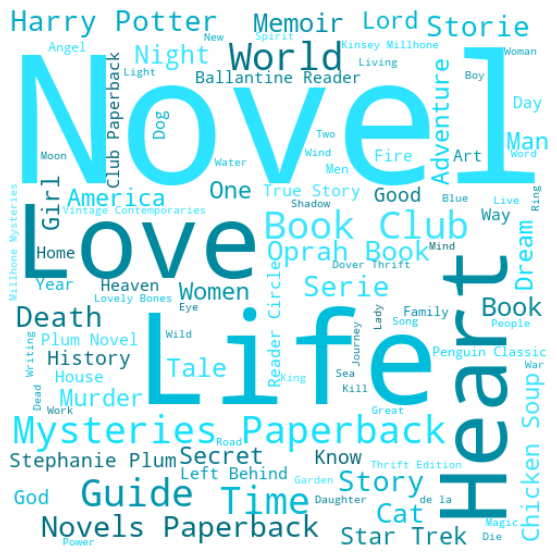

In [85]:
plt.subplots(figsize=(10,10))
wc = WordCloud(background_color="white", max_words=100,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=52, width=500, height=500,color_func=color_func)
wc.generate(' '.join(df_recommendation['bookTitle']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

The word the most present in boks read by users is "Love", "Life" and "Novel".

## Recommendation system

Now that the dataframe df_recommendation is ready, we can start doing a model for recommend books.
First, we export the dataframe to csv to allow working on it from an other notebook designed for it. 

In [86]:
df_recommendation.to_csv('dataset/final_dataset.csv', sep=';', index=False)